<a href="https://colab.research.google.com/github/mwahaha-umich/ACLUFinalProject/blob/main/ACLU_Project_Waffle_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
import requests

if 'google.colab' in str(get_ipython()):
  #We keep changing the different paths, so I'm going to check if various configurations exist.
  if (os.path.isdir("/content/drive/MyDrive/Shared with me/content/drive/My Drive/Shared with me/ACLU/")):
    GoogleDriveBase = "/content/drive/MyDrive/Shared with me/content/drive/My Drive/Shared with me/" #Anupriya
    WorkingDirectory = GoogleDriveBase + 'ACLU/' #Anupriya
  elif (os.path.isdir("/content/drive/MyDrive/Projects/ACLU")):
    GoogleDriveBase = "/content/drive/MyDrive/" #Mackenzie
    WorkingDirectory = GoogleDriveBase + "Projects/ACLU/" #Mackenzie
  else:  
    if (os.path.isdir("/content/drive/My Drive/Projects/ACLU/")):
      GoogleDriveBase = "/content/drive/My Drive/" #Kyle
      WorkingDirectory = GoogleDriveBase + "Projects/ACLU/" #Kyle
else: # We're not running in Google Colab, which means we're probably running locally. 
  #Put code here for local copies of the files
  GoogleDriveBase = "" 
  WorkingDirectory = GoogleDriveBase + "" 


WorkingFiles = WorkingDirectory + 'WorkingFiles/'
BasePickeDrive = GoogleDriveBase + WorkingDirectory + "Pickle/"


#Make the necessary folders for the script to run.
ListOfAllRequiredDirectories = [WorkingDirectory + 'Pickle', 
                          WorkingDirectory + 'WorkingFiles',
                          WorkingDirectory + 'AdditionalData',
                          WorkingDirectory + 'ACLUData']

for folder in ListOfAllRequiredDirectories:
  RunningPath = GoogleDriveBase + folder + "/"
  Path(RunningPath).mkdir(parents=True, exist_ok=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 526 kB 35.8 MB/s 


In [ ]:
dfWaffle = pd.read_csv(WorkingFiles + "waffle_df.csv")
dfWaffle['CampaignType'] = dfWaffle['CampaignType'].replace({'oakland': 'ocp', 
                                                           'oakland prosecutor': 'ocp', 
                                                           'oakland county prosecutor race': 'ocp'})
dfWaffle['CommunicationType'] = dfWaffle['CommunicationType'].replace({'phone': 'call'})

dfWaffle.head()
campaigns = dfWaffle[['CampaignType','CommunicationType','NoVote','Primary','General','VoteBoth']]
campaigns.head()

,CampaignType,CommunicationType,NoVote,Primary,General,VoteBoth
0,scomi,text,40,9,65,82
1,scomi,text,6,0,13,17
2,scomi,text,1,0,1,5
3,scomi,text,0,0,1,0
4,scomi,text,1,0,2,6


In [ ]:
waffle_counts = campaigns.groupby(['CampaignType', 'CommunicationType']).sum()
waffle_counts['Total'] = waffle_counts.sum(axis=1)
waffle_counts = waffle_counts.reset_index()
waffle_counts.head()

,CampaignType,CommunicationType,NoVote,Primary,General,VoteBoth,Total
0,lpv,call,64266,7204,126402,103167,301039
1,lpv,mail,97055,6336,129980,116270,349641
2,lpv,postcards,4627,65,6762,3553,15007
3,lpv,text,524694,21204,593347,500427,1639672
4,ocp,call,1036,355,7741,64580,73712


In [ ]:
waffle_counts['NoVote'] = round((waffle_counts['NoVote'] / waffle_counts['Total'])*100)
waffle_counts['Primary'] = round((waffle_counts['Primary'] / waffle_counts['Total'])*100)
waffle_counts['General'] = round((waffle_counts['General'] / waffle_counts['Total'])*100)
waffle_counts['VoteBoth'] = round((waffle_counts['VoteBoth'] / waffle_counts['Total'])*100)
waffle_counts

,CampaignType,CommunicationType,NoVote,Primary,General,VoteBoth,Total
0,lpv,call,21.0,2.0,42.0,34.0,301039
1,lpv,mail,28.0,2.0,37.0,33.0,349641
2,lpv,postcards,31.0,0.0,45.0,24.0,15007
3,lpv,text,32.0,1.0,36.0,31.0,1639672
4,ocp,call,1.0,0.0,11.0,88.0,73712
5,ocp,mail,3.0,1.0,10.0,87.0,292939
6,ocp,text,22.0,1.0,31.0,46.0,374967
7,scomi,text,13.0,2.0,34.0,50.0,149854


In [ ]:
lpv = waffle_counts[waffle_counts['CampaignType']=='lpv']
lpv = lpv.set_index('CommunicationType')
lpv

,CampaignType,NoVote,Primary,General,VoteBoth,Total
CommunicationType,,,,,,
call,lpv,21.0,2.0,42.0,34.0,301039
mail,lpv,28.0,2.0,37.0,33.0,349641
postcards,lpv,31.0,0.0,45.0,24.0,15007
text,lpv,32.0,1.0,36.0,31.0,1639672


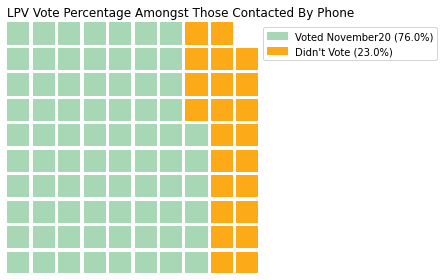

In [ ]:
data = {'Voted November20': lpv.loc['call']['General'] + lpv.loc['call']['VoteBoth'], "Didn't Vote": lpv.loc['call']['NoVote'] + lpv.loc['call']['Primary']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#a7d7b5", "#fcaa17"),
    title={'label': 'LPV Vote Percentage Amongst Those Contacted By Phone', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
# fig.gca().set_facecolor('#EEEEEE')
# fig.set_facecolor('#EEEEEE')
#colors=("#a7d7b5", "#fcaa17", "#a3dbe3", "#fabeaf"),
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(go.Heatmap(x=xlabels, y = ylabels, z=z,
                           customdata=customdata, xgap=3, ygap=3,
                           colorscale=colorscale, showscale=False,
                           hovertemplate="(%{y}, %{x}): %{customdata})<extra></extra>"))
fig.update_layout(width=600, height=450, yaxis_autorange='reversed')

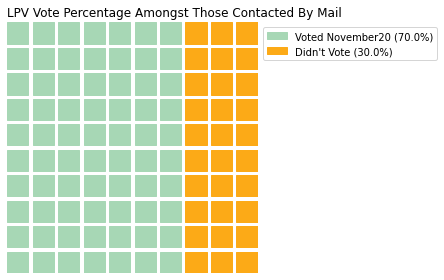

In [ ]:
data = {'Voted November20': lpv.loc['mail']['General'] + lpv.loc['mail']['VoteBoth'], "Didn't Vote": lpv.loc['mail']['NoVote'] + lpv.loc['mail']['Primary']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#a7d7b5", "#fcaa17"),
    title={'label': 'LPV Vote Percentage Amongst Those Contacted By Mail', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

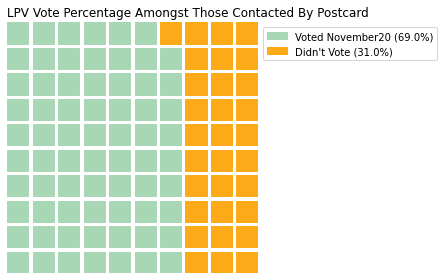

In [ ]:
data = {'Voted November20': lpv.loc['postcards']['General'] + lpv.loc['postcards']['VoteBoth'], "Didn't Vote": lpv.loc['postcards']['NoVote'] + lpv.loc['postcards']['Primary']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#a7d7b5", "#fcaa17"),
    title={'label': 'LPV Vote Percentage Amongst Those Contacted By Postcard', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

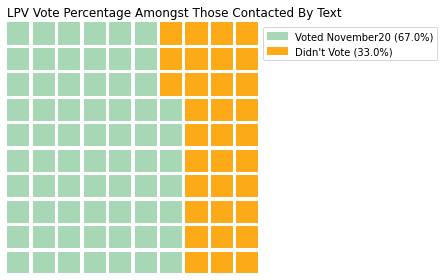

In [ ]:
data = {'Voted November20': lpv.loc['text']['General'] + lpv.loc['text']['VoteBoth'], "Didn't Vote": lpv.loc['text']['NoVote'] + lpv.loc['text']['Primary']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#a7d7b5", "#fcaa17"),
    title={'label': 'LPV Vote Percentage Amongst Those Contacted By Text', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

In [ ]:
scomi = waffle_counts[waffle_counts['CampaignType']=='scomi']
scomi = scomi.set_index('CommunicationType')
scomi

,CampaignType,NoVote,Primary,General,VoteBoth,Total
CommunicationType,,,,,,
text,scomi,13.0,2.0,34.0,50.0,149854


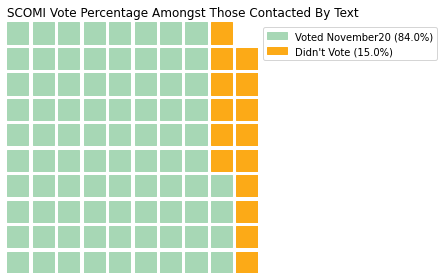

In [ ]:
data = {'Voted November20': scomi.loc['text']['General'] + scomi.loc['text']['VoteBoth'], "Didn't Vote": scomi.loc['text']['NoVote'] + scomi.loc['text']['Primary']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#a7d7b5", "#fcaa17"),
    title={'label': 'SCOMI Vote Percentage Amongst Those Contacted By Text', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

In [ ]:
ocp = waffle_counts[waffle_counts['CampaignType']=='ocp']
ocp = ocp.set_index('CommunicationType')
ocp

,CampaignType,NoVote,Primary,General,VoteBoth,Total
CommunicationType,,,,,,
call,ocp,1.0,0.0,11.0,88.0,73712
mail,ocp,3.0,1.0,10.0,87.0,292939
text,ocp,22.0,1.0,31.0,46.0,374967


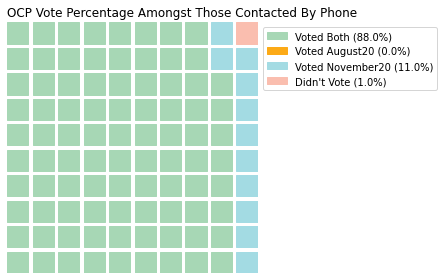

In [ ]:
data = {'Voted Both': ocp.loc['call']['VoteBoth'], 'Voted August20': ocp.loc['call']['Primary'], 
        'Voted November20': ocp.loc['call']['General'], "Didn't Vote": ocp.loc['call']['NoVote']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#a7d7b5", "#fcaa17", "#a3dbe3", "#fabeaf"),
    title={'label': 'OCP Vote Percentage Amongst Those Contacted By Phone', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

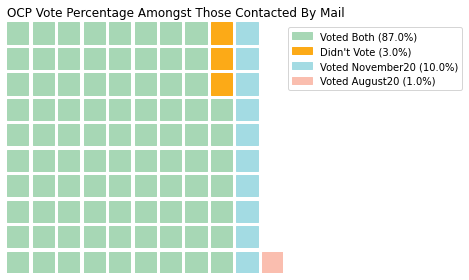

In [ ]:
data = {'Voted Both': ocp.loc['mail']['VoteBoth'], 
        "Didn't Vote": ocp.loc['mail']['NoVote'], 'Voted November20': ocp.loc['mail']['General'], 'Voted August20': ocp.loc['mail']['Primary']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#a7d7b5", "#fcaa17", "#a3dbe3", "#fabeaf"),
    title={'label': 'OCP Vote Percentage Amongst Those Contacted By Mail', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

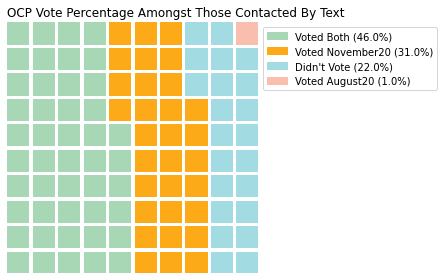

In [ ]:
data = {'Voted Both': ocp.loc['text']['VoteBoth'], 'Voted November20': ocp.loc['text']['General'], 
        "Didn't Vote": ocp.loc['text']['NoVote'], 'Voted August20': ocp.loc['text']['Primary']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#a7d7b5", "#fcaa17", "#a3dbe3", "#fabeaf"),
    title={'label': 'OCP Vote Percentage Amongst Those Contacted By Text', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()